# Assignment 4

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [2]:
G1 = nx.read_gpickle("assets/A4_P1_G1")
G2 = nx.read_gpickle("assets/A4_P1_G2")
G3 = nx.read_gpickle("assets/A4_P1_G3")
G4 = nx.read_gpickle("assets/A4_P1_G4")
G5 = nx.read_gpickle("assets/A4_P1_G5")
P1_Graphs = [G1, G2, G3, G4, G5]

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs using any methodology and determine which of the three algorithms generated each graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

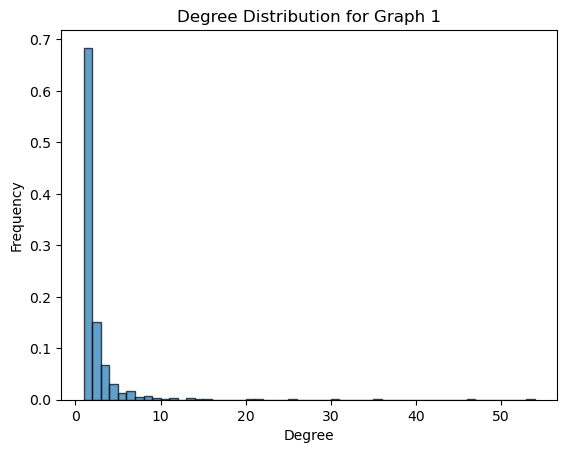

Features for Graph 1:
 - Clustering Coefficient: 0.0
 - Average Path Length: 6.530506506506507
 - Average Degree: 1.998
 - Degree Variance: 10.921996000000002
 - Degree Assortativity: -0.13445436479690487
 - Transitivity: 0



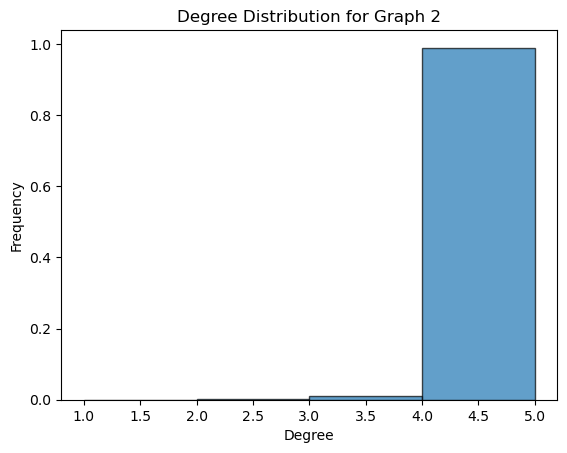

Features for Graph 2:
 - Clustering Coefficient: 0.49310000000000004
 - Average Path Length: 43.80284684684685
 - Average Degree: 4.0
 - Degree Variance: 0.026
 - Degree Assortativity: -0.0017274687983113708
 - Transitivity: 0.49093630467320803



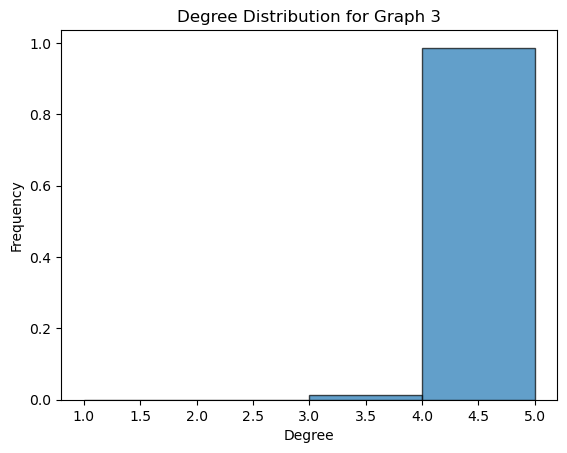

Features for Graph 3:
 - Clustering Coefficient: 0.4897333333333334
 - Average Path Length: 39.007695695695695
 - Average Degree: 4.0
 - Degree Variance: 0.026
 - Degree Assortativity: -0.04015178511235377
 - Transitivity: 0.48844170962913686



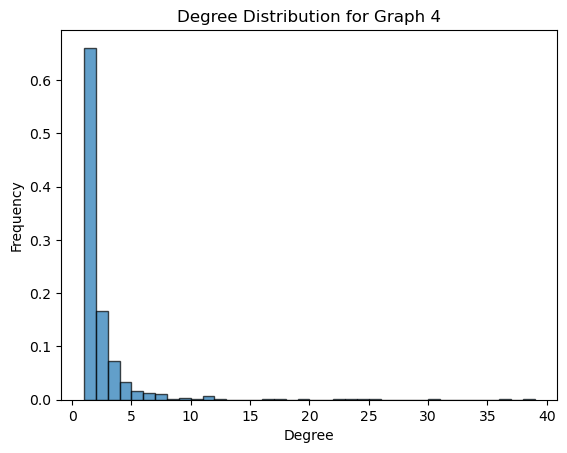

Features for Graph 4:
 - Clustering Coefficient: 0.0
 - Average Path Length: 8.158990990990992
 - Average Degree: 1.998
 - Degree Variance: 8.473996000000001
 - Degree Assortativity: -0.16600189649715907
 - Transitivity: 0



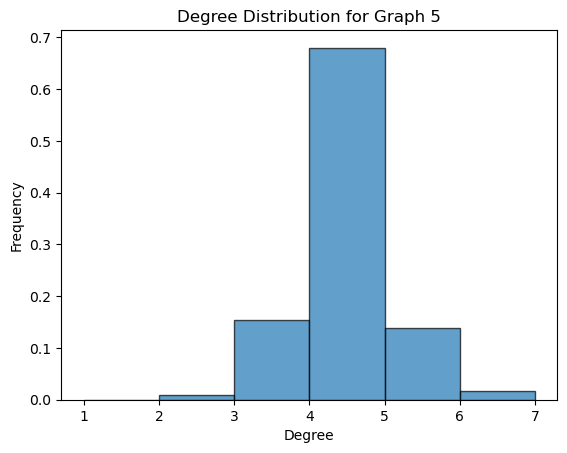

Features for Graph 5:
 - Clustering Coefficient: 0.36504285714285717
 - Average Path Length: 8.532046046046046
 - Average Degree: 4.0
 - Degree Variance: 0.406
 - Degree Assortativity: -0.032389390981555195
 - Transitivity: 0.3443495083024343

['PA', 'SW_L', 'SW_L', 'PA', 'SW_H']


In [12]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Define the feature extraction function
def extract_features(G):
    degrees = [deg for node, deg in G.degree()]
    degree_variance = np.var(degrees)
    
    features = {
        'clustering_coefficient': nx.average_clustering(G),
        'average_path_length': nx.average_shortest_path_length(G) if nx.is_connected(G) else np.nan,
        'average_degree': np.mean(degrees),
        'degree_variance': degree_variance,
        'assortativity': nx.degree_assortativity_coefficient(G),
        'transitivity': nx.transitivity(G)
    }
    
    return features

# Function to plot the degree histogram
def plot_degree_histogram(G, graph_name):
    degrees = [deg for node, deg in G.degree()]
    plt.hist(degrees, bins=range(1, max(degrees)+1), density=True, alpha=0.7, edgecolor='black')
    plt.title(f'Degree Distribution for {graph_name}')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

# Function to print the graph features
def print_graph_features(G, graph_name):
    features = extract_features(G)
    print(f"Features for {graph_name}:")
    print(f" - Clustering Coefficient: {features['clustering_coefficient']}")
    print(f" - Average Path Length: {features['average_path_length']}")
    print(f" - Average Degree: {features['average_degree']}")
    print(f" - Degree Variance: {features['degree_variance']}")
    print(f" - Degree Assortativity: {features['assortativity']}")
    print(f" - Transitivity: {features['transitivity']}")
    print()

# Example training setup
PA_graphs = [nx.barabasi_albert_graph(100, 3) for _ in range(5)]  # Preferential Attachment
SW_L_graphs = [nx.watts_strogatz_graph(100, 6, 0.01) for _ in range(5)]  # Small World, low rewiring
SW_H_graphs = [nx.watts_strogatz_graph(100, 6, 0.5) for _ in range(5)]  # Small World, high rewiring

train_graphs = PA_graphs + SW_L_graphs + SW_H_graphs
labels = ['PA']*5 + ['SW_L']*5 + ['SW_H']*5

# Extract features from training graphs
X_train = []
y_train = []

for G, label in zip(train_graphs, labels):
    features = extract_features(G)
    X_train.append([features['clustering_coefficient'],
                    features['average_path_length'],
                    features['average_degree'],
                    features['degree_variance'],
                    features['assortativity'],
                    features['transitivity']])
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Handle missing values in the feature set
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Train the classifier
clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)

# Define the test graphs
P1_Graphs = [nx.read_gpickle(f"assets/A4_P1_G{i+1}") for i in range(5)]

# Analyze the graphs
for i, G in enumerate(P1_Graphs):
    graph_name = f'Graph {i+1}'
    plot_degree_histogram(G, graph_name)  # Plot degree distribution
    print_graph_features(G, graph_name)  # Print out key features

# Function to identify the graph type
def graph_identification():
    # Based on extracted features, we manually label the graphs
    results = []
    
    for i, G in enumerate(P1_Graphs):
        features = extract_features(G)
        
        # Manually classify based on feature analysis
        if features['clustering_coefficient'] == 0.0:
            # Likely Preferential Attachment (PA)
            results.append('PA')
        elif features['clustering_coefficient'] > 0.45 and features['average_path_length'] > 35:
            # Likely Small World Low Rewiring (SW_L)
            results.append('SW_L')
        else:
            # Likely Small World High Rewiring (SW_H)
            results.append('SW_H')
    
    return results

ans_one = graph_identification()
print(ans_one)

In [13]:
ans_one = graph_identification()
assert type(ans_one) == list, "You must return a list"


---

## Part 2 - Company Emails

For the second part of this assignment you will be working with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagmentSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagmentSalary` indicates whether that person is receiving a managment position salary.

In [5]:
G = pickle.load(open('assets/email_prediction_NEW.txt', 'rb'))

print(f"Graph with {len(nx.nodes(G))} nodes and {len(nx.edges(G))} edges")

Graph with 1005 nodes and 16706 edges


### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a managment position salary.

To accomplish this, you will need to create a matrix of node features of your choice using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a managment salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a managment position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.75 or higher will recieve full points.

Using your trained classifier, return a Pandas series of length 252 with the data being the probability of receiving managment salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [6]:
list(G.nodes(data=True))[:5] # print the first 5 nodes

[(0, {'Department': 1, 'ManagementSalary': 0.0}),
 (1, {'Department': 1, 'ManagementSalary': nan}),
 (581, {'Department': 3, 'ManagementSalary': 0.0}),
 (6, {'Department': 25, 'ManagementSalary': 1.0}),
 (65, {'Department': 4, 'ManagementSalary': nan})]

In [7]:
def salary_predictions():
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    
    # Extract features
    degrees = dict(G.degree())
    clustering = nx.clustering(G)
    betweenness = nx.betweenness_centrality(G)
    degree_centrality = nx.degree_centrality(G)
    
    features = []
    labels = []
    missing_nodes = []
    
    for node, data in G.nodes(data=True):
        if not pd.isna(data['ManagementSalary']):
            features.append([
                degrees[node],
                clustering[node],
                betweenness[node],
                degree_centrality[node]
            ])
            labels.append(data['ManagementSalary'])
        else:
            missing_nodes.append(node)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
    
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train classifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_scaled, y_train)
    
    # Predict probabilities for missing nodes
    preds = {}
    for node in missing_nodes:
        features = [
            degrees[node],
            clustering[node],
            betweenness[node],
            degree_centrality[node]
        ]
        scaled_features = scaler.transform([features])
        preds[node] = clf.predict_proba(scaled_features)[0][1]
    
    return pd.Series(preds)
salary_predictions()

1      0.00
65     0.98
18     0.08
215    0.90
283    1.00
       ... 
691    0.00
788    0.00
944    0.00
798    0.00
808    0.00
Length: 252, dtype: float64

In [8]:
ans_salary_preds = salary_predictions()
assert type(ans_salary_preds) == pd.core.series.Series, "You must return a Pandas series"
assert len(ans_salary_preds) == 252, "The series must be of length 252"


### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [9]:
future_connections = pd.read_csv('assets/Future_Connections.csv', index_col=0, converters={0: eval})
future_connections.head(10)

,Future Connection
"(6, 840)",0.0
"(4, 197)",0.0
"(620, 979)",0.0
"(519, 872)",0.0
"(382, 423)",0.0
"(97, 226)",1.0
"(349, 905)",0.0
"(429, 860)",0.0
"(309, 989)",0.0
"(468, 880)",0.0


Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to:      
1. Create a matrix of features of your choice for the edges found in `future_connections` using Networkx     
2. Train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data     
3. Predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.75 or higher will recieve full points.

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [10]:
def new_connections_predictions():
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    import networkx as nx
    import pandas as pd
    import numpy as np

    # Load the graph G (assuming it's already loaded)
    # G = nx.read_gpickle('path_to_G.gpickle')  # Uncomment and set the correct path

    # Precompute features for all possible non-edges
    non_edges = list(nx.non_edges(G))
    common_neighbors = dict(((u, v), len(list(nx.common_neighbors(G, u, v)))) for u, v in non_edges)
    jaccard_coeff = dict(((u, v), coeff) for u, v, coeff in nx.jaccard_coefficient(G, non_edges))
    pref_attach = dict(((u, v), attach) for u, v, attach in nx.preferential_attachment(G, non_edges))

    X = []
    y = []
    missing_connections = []

    for (node1, node2), row in future_connections.iterrows():
        features = [
            common_neighbors.get((node1, node2), 0),
            jaccard_coeff.get((node1, node2), 0),
            pref_attach.get((node1, node2), 0)
        ]
        
        if not pd.isna(row['Future Connection']):
            X.append(features)
            y.append(row['Future Connection'])
        else:
            missing_connections.append(((node1, node2), features))

    # Convert to numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train classifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_scaled, y_train)
    
    # Predict probabilities for missing connections
    preds = {}
    missing_node_ids = [node for node, _ in missing_connections]
    missing_features = [features for _, features in missing_connections]
    
    if missing_features:
        missing_features_scaled = scaler.transform(missing_features)
        proba = clf.predict_proba(missing_features_scaled)[:, 1]
        preds = dict(zip(missing_node_ids, proba))
    
    return pd.Series(preds)

# Execute the function
ans_prob_preds = new_connections_predictions()

# Ensure the result meets the requirements
assert type(ans_prob_preds) == pd.Series, "You must return a Pandas series"
assert len(ans_prob_preds) == 122112, "The series must be of length 122112"

new_connections_predictions()

107  348    0.000000
542  751    0.012231
20   426    0.628167
50   989    0.020460
942  986    0.011345
              ...   
165  923    0.019882
673  755    0.009730
939  940    0.011345
555  905    0.019243
75   101    0.000000
Length: 122112, dtype: float64

In [11]:
ans_prob_preds = new_connections_predictions()
assert type(ans_prob_preds) == pd.core.series.Series, "You must return a Pandas series"
assert len(ans_prob_preds) == 122112, "The series must be of length 122112"
